# Modelagem de Sistemas: Propagação de Malware em Redes de Computadores

## 1. Introdução e Definição do Problema

A segurança cibernética é um dos maiores desafios da computação moderna. A propagação de *malware* (vírus, *worms*, *botnets*) em redes corporativas ou na internet segue padrões dinâmicos que podem ser modelados matematicamente para prever surtos e definir estratégias de defesa.

Neste trabalho, modelamos a dinâmica de infecção de uma rede de computadores usando uma variação do modelo epidemiológico **SIS (Suscetível-Infectado-Suscetível)**.

### O Cenário
Consideramos uma rede fechada com um número fixo de dispositivos. Cada dispositivo pode estar em um de dois estados:
1.  **Suscetível ($S$):** O computador está "saudável", mas vulnerável a infecções.
2.  **Infectado ($I$):** O computador possui o malware e está ativamente tentando infectar outros dispositivos da rede.

Diferente de sistemas biológicos onde a imunidade pode ser permanente, em sistemas computacionais, um computador "curado" (formatado ou limpo) volta a ser suscetível a novas infecções imediatamente, a menos que uma defesa ativa (controle) seja mantida.

## 2. Modelagem Matemática

Consideramos que a população total da rede é normalizada para $N=1$ (100%). Portanto:
$$S(t) + I(t) = 1 \implies S(t) = 1 - I(t)$$

Isso nos permite reduzir o sistema a uma única Equação Diferencial Ordinária (EDO) não linear que descreve a evolução da proporção de infectados $I(t)$.

### A Equação Diferencial
$$\frac{dI}{dt} = \beta I(t) (1 - I(t)) - u(t) I(t)$$

### Definição das Variáveis e Parâmetros

* **$I(t)$ (Variável de Estado):** Fração da rede infectada no tempo $t$ (varia de 0 a 1).
* **$\beta$ (Taxa de Infecção):** Parâmetro que representa a "virulência" do malware e a conectividade da rede. Define a probabilidade de um nó infectado contaminar um nó suscetível vizinho.
* **$u(t)$ (Entrada de Controle):** Taxa de recuperação/cura. Representa a ação do administrador da rede ou software antivírus (instalação de patches, reinicialização, bloqueio de portas).
    * No contexto de controle, $u(t)$ é a variável que manipulamos para extinguir o vírus.

### Análise da Não Linearidade

A equação pode ser reescrita expandindo os termos:
$$\dot{I} = \beta I - \beta I^2 - u I$$

O sistema é **Não Linear** devido ao termo quadrático **$- \beta I^2$**.

## 3. Resolução Matemática 


A equação diferencial é:
$$\frac{dI}{dt} = (\beta - u)I - \beta I^2$$

Para simplificar a notação durante a dedução, definimos a taxa líquida de crescimento inicial como $r = \beta - u$. A equação torna-se:
$$\frac{dI}{dt} = rI - \beta I^2 = I(r - \beta I)$$

### Passo 1: Separação de Variáveis
Reorganizamos os termos para isolar as dependências de $I$ e $t$:
$$\frac{1}{I(r - \beta I)} dI = dt$$

Integramos ambos os lados:
$$\int \frac{1}{I(r - \beta I)} dI = \int dt$$

### Passo 2: Frações Parciais
O termo da esquerda deve ser expandido em frações parciais para ser integrado:
$$\frac{1}{I(r - \beta I)} = \frac{A}{I} + \frac{B}{r - \beta I}$$
Resolvendo para as constantes, encontramos $A = 1/r$ e $B = \beta/r$. Substituindo na integral:

$$\frac{1}{r} \int \left( \frac{1}{I} + \frac{\beta}{r - \beta I} \right) dI = t + C$$

### Passo 3: Integração e Solução Geral
Resolvendo as integrais logarítmicas:
$$\frac{1}{r} \left( \ln|I| - \ln|r - \beta I| \right) = t + C$$

Usando propriedades de logaritmo e aplicando a exponencial para isolar $I(t)$, chegamos à solução geral da Equação Logística:

$$I(t) = \frac{r (\beta - u)}{\beta + C_k \cdot e^{-(\beta - u)t}}$$

Onde a constante $C_k$ é determinada pelas condições iniciais $I(0) = I_0$.

### Conclusão da Análise
* Se t -> $ \infty $, o termo exponencial zera e a expressão tende ao valor de equilibrio: $I_{eq} = \frac{(\beta - u)}{\beta}$.

* Se $\beta > u$, o termo exponencial decai e $I(t)$ tende para o valor de equilíbrio: $I_{eq} = \frac{(\beta - u)}{\beta}$.
* Se $\beta < u$, o expoente se torna positivo no denominador, fazendo $I(t)$ tender a zero (erradicação do malware).

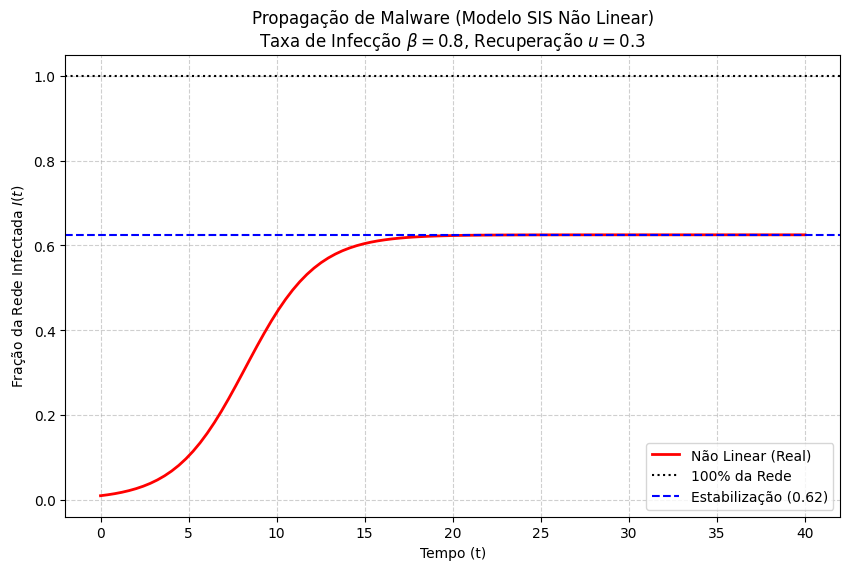

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# beta: Taxa de transmissão (força do vírus)
# u_input: Taxa de recuperação (ação do antivírus/admin)
beta = 0.8  
u_input = 0.3 

def modelo_malware(I, t, beta, u):
    # I: Fração infectada da rede (0.0 a 1.0)
    # A equação: dI/dt = beta*I*(1-I) - u*I
    dIdt = beta * I * (1 - I) - u * I
    return dIdt

# Começamos com 1% da rede infectada
I0 = 0.01 

# Vetor de tempo: de 0 a 40 
t = np.linspace(0, 40, 100)

# Resolução Numérica (Integração)
solucao_nao_linear = odeint(modelo_malware, I0, t, args=(beta, u_input))

# O odeint retorna uma matriz, pegamos a coluna 0
I_nao_linear = solucao_nao_linear[:, 0]

# PLOTAGEM DOS RESULTADOS
plt.figure(figsize=(10, 6))
plt.plot(t, I_nao_linear, 'r-', linewidth=2, label='Não Linear (Real)')

# Estética do gráfico
plt.title(f'Propagação de Malware (Modelo SIS Não Linear)\nTaxa de Infecção $\\beta={beta}$, Recuperação $u={u_input}$')
plt.xlabel('Tempo (t)')
plt.ylabel('Fração da Rede Infectada $I(t)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=1.0, color='k', linestyle=':', label='100% da Rede')

# Mostra onde o sistema estabiliza (Equilíbrio visual)
equilibrio_final = I_nao_linear[-1]
plt.axhline(y=equilibrio_final, color='b', linestyle='--', label=f'Estabilização ({equilibrio_final:.2f})')

plt.legend()
plt.show()

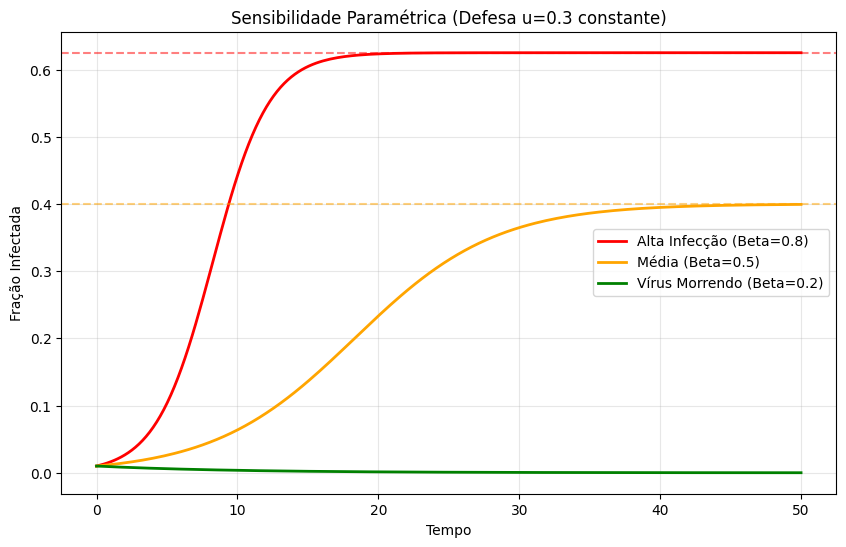

In [3]:
# Comparando diferentes "agressividades" do vírus (Beta)
# Mantemos a defesa (u) constante
u_fixo = 0.3
betas_teste = [0.8, 0.5, 0.2]  # Alto, Médio, Baixo
nomes = ['Alta Infecção (Beta=0.8)', 'Média (Beta=0.5)', 'Vírus Morrendo (Beta=0.2)']
cores = ['r', 'orange', 'g']

plt.figure(figsize=(10, 6))

t = np.linspace(0, 50, 200)

for beta, nome, cor in zip(betas_teste, nomes, cores):
    # Simula
    sol = odeint(modelo_malware, I0, t, args=(beta, u_fixo))
    I_res = sol[:, 0]
    
    # Plota
    plt.plot(t, I_res, color=cor, linewidth=2, label=f'{nome}')
    
    # Calcula o ponto de equilíbrio teórico: I_eq = 1 - u/beta
    if beta > u_fixo:
        eq_teorico = 1 - (u_fixo/beta)
        plt.axhline(y=eq_teorico, color=cor, linestyle='--', alpha=0.5)

plt.title(f'Sensibilidade Paramétrica (Defesa u={u_fixo} constante)')
plt.xlabel('Tempo')
plt.ylabel('Fração Infectada')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 4. Linearização por Série de Taylor em Múltiplos Pontos

A linearização é uma aproximação local. Um sistema não linear não possui uma única Função de Transferência; ele possui infinitas, dependendo de onde o sistema está operando.

Para demonstrar isso, vamos linearizar o sistema em três cenários distintos de infecção.

### 4.1. Definição do Modelo Linear Geral

A equação não linear é:
$$f(I, u) = \dot{I} = \beta I - \beta I^2 - u I$$

Expandindo por Taylor em torno de um ponto genérico ($I_{op}, u_{op}$), obtemos a equação linearizada nas variáveis de desvio ($\tilde{I}, \tilde{u}$):

$$\dot{\tilde{I}} = A \cdot \tilde{I} + B \cdot \tilde{u}$$

Onde os Jacobianos são:
* **Matriz A (Dinâmica):** $A = \frac{\partial f}{\partial I} = \beta - 2\beta I_{op} - u_{op}$
* **Matriz B (Entrada):** $B = \frac{\partial f}{\partial u} = -I_{op}$

A Função de Transferência resultante (aplicando Laplace) é dada por:
$$G(s) = \frac{\tilde{I}(s)}{\tilde{U}(s)} = \frac{B}{s - A}$$

---

### 4.2. Cálculo para Diferentes Pontos de Operação

Vamos fixar os parâmetros do sistema: $\beta = 0.8$ e $u_{nom} = 0.3$.

#### Caso A: Início da Infecção (Ponto Instável)
* **Ponto de Operação:** $I_{op} = 0.01$ (1% infectado)
* **Cálculo de A:** $A = 0.8 - 2(0.8)(0.01) - 0.3 = 0.484$
* **Cálculo de B:** $B = -0.01$

> **Equação Diferencial Linearizada:**
> $$\dot{\tilde{I}} = 0.484 \tilde{I} - 0.01 \tilde{u}$$
>
> **Função de Transferência:**
> $$G_1(s) = \frac{-0.01}{s - 0.484}$$
> *Análise:* O polo está em $+0.484$ (positivo). O sistema é **INSTÁVEL**. Isso condiz com a realidade: no início, a infecção cresce exponencialmente sem controle.

#### Caso B: Infecção Intermediária (Transição)
* **Ponto de Operação:** $I_{op} = 0.30$ (30% infectado)
* **Cálculo de A:** $A = 0.8 - 2(0.8)(0.30) - 0.3 = 0.02$
* **Cálculo de B:** $B = -0.30$

> **Equação Diferencial Linearizada:**
> $$\dot{\tilde{I}} = 0.02 \tilde{I} - 0.30 \tilde{u}$$
>
> **Função de Transferência:**
> $$G_2(s) = \frac{-0.30}{s - 0.02}$$
> *Análise:* O polo é $+0.02$ (quase zero). O sistema está na "borda" da estabilidade. A aceleração da infecção é muito baixa.

#### Caso C: Equilíbrio Endêmico (Ponto Estável)
* **Ponto de Operação:** $I_{op} = 0.625$ (62.5% infectado)
* **Cálculo de A:** $A = 0.8 - 2(0.8)(0.625) - 0.3 = -0.5$
* **Cálculo de B:** $B = -0.625$

> **Equação Diferencial Linearizada:**
> $$\dot{\tilde{I}} = -0.5 \tilde{I} - 0.625 \tilde{u}$$
>
> **Função de Transferência:**
> $$G_3(s) = \frac{-0.625}{s + 0.5}$$
> *Análise:* O polo está em $-0.5$ (negativo). O sistema é **ESTÁVEL**. Qualquer perturbação tende a desaparecer e o sistema volta ao equilíbrio. É aqui que projetaremos controladores.

REFERENCIA:https://www.ces.ufcg.edu.br/portal/phocadownload/userupload/COVID-19_MODELO_SIR.pdf